you will be working with two parabolas:
$$
x = y^2 
$$
and 
$$
x^2 = 9x - 4y - 12.
$$

Sketch of the two parabolas on the same set of $xy$-axes. Be sure to label the $x$- and $y$-axes, and the $xy$-coordinates of all points of intersection. If you draw it correctly, you will notice there are two enclosed regions; shade in the larger of the two.

Then find the area enclosed by integrating with respect to dx and then with respect to dy.

Numerical area by integrating with respect to x: 15.375
Numerical area by integrating with respect to y: 8.374999999999998


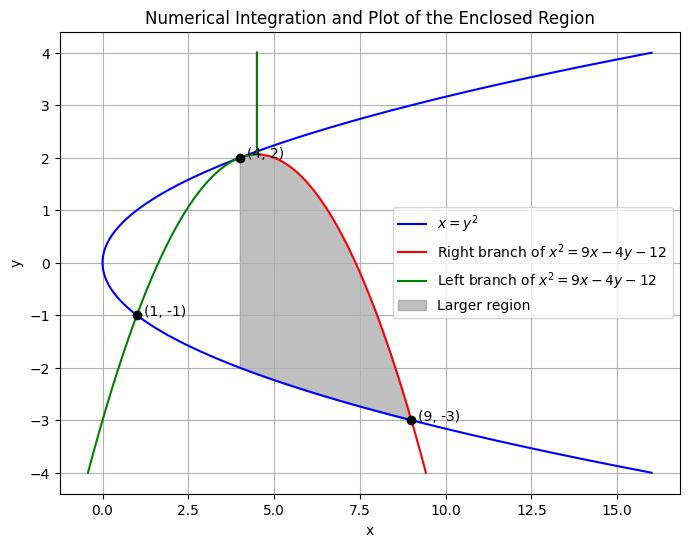

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define functions for numerical integration.

# For integration with respect to x:
# Top function: from the curve x^2 = 9x - 4y -12, solved for y:
def top_y(x):
    return (-x**2 + 9*x - 12) / 4

# Bottom function: from the curve x = y^2, using the lower branch y = -sqrt(x)
def bottom_y(x):
    return -np.sqrt(x)

# Compute the area by integrating with respect to x from x=4 to x=9.
area_dx, err_dx = quad(lambda x: top_y(x) - bottom_y(x), 4, 9)
print("Numerical area by integrating with respect to x:", area_dx)

# For integration with respect to y:
# Right function: solving x^2 - 9x + 4y + 12 = 0 for x gives:
# x = (9 + sqrt(33 - 16y)) / 2   (the right branch)
def right_x(y):
    return (9 + np.sqrt(33 - 16*y)) / 2

# Left function: from x = y^2.
def left_x(y):
    return y**2

# Compute the area by integrating with respect to y from y=-3 to y=-1.
area_dy, err_dy = quad(lambda y: right_x(y) - left_x(y), -3, -1)
print("Numerical area by integrating with respect to y:", area_dy)

# Plot the curves and shade the larger region.
# Create a range for y values for plotting x = y^2.
y_vals = np.linspace(-4, 4, 400)
x_parabola = y_vals**2

# For the second curve, compute both branches: x = (9 ± sqrt(33-16y))/2.
# Use np.clip to avoid negative values inside the square root.
sqrt_term = np.sqrt(np.clip(33 - 16*y_vals, 0, None))
x_right = (9 + sqrt_term) / 2
x_left = (9 - sqrt_term) / 2

plt.figure(figsize=(8, 6))
plt.plot(x_parabola, y_vals, label=r'$x = y^2$', color='blue')
plt.plot(x_right, y_vals, label=r'Right branch of $x^2=9x-4y-12$', color='red')
plt.plot(x_left, y_vals, label=r'Left branch of $x^2=9x-4y-12$', color='green')

# Mark the intersection points: (1, -1), (4, 2), (9, -3)
intersections = [(1, -1), (4, 2), (9, -3)]
for pt in intersections:
    plt.plot(pt[0], pt[1], 'ko')
    plt.text(pt[0] + 0.2, pt[1], f'{pt}', fontsize=10)

# Shade the larger region (using the dx integration boundaries: x from 4 to 9).
x_fill = np.linspace(4, 9, 300)
y_top_fill = top_y(x_fill)
y_bottom_fill = bottom_y(x_fill)
plt.fill_between(x_fill, y_bottom_fill, y_top_fill, color='gray', alpha=0.5, label='Larger region')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Integration and Plot of the Enclosed Region')
plt.legend()
plt.grid(True)
plt.show()

Intersection Points:
(9, -3)
(1, -1)
(4, 2)

Area by integrating with respect to x: 123/8
Area by integrating with respect to y: 67/8


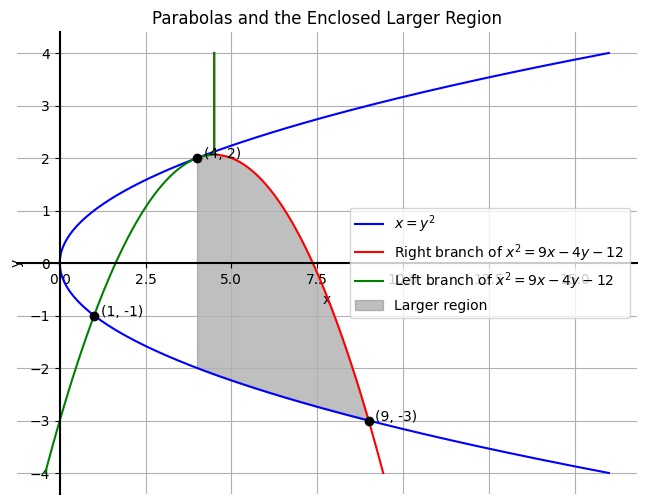

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
x, y = sp.symbols('x y', real=True)

# Define the equations of the curves:
# Equation 1: x = y^2
# Equation 2: x^2 = 9x - 4y - 12  --> we can also write it as x^2 - 9x + 4y + 12 = 0

# -------------------------------
# 1. Find the Intersection Points
# -------------------------------

# Substitute x = y^2 into eq. 2:
expr = sp.Eq((y**2)**2, 9*y**2 - 4*y - 12)
# Solve the resulting quartic in y:
y_solutions = sp.solve(expr, y)
# Now find x for each y (using x = y^2)
intersection_points = [(sp.simplify(sol**2), sp.simplify(sol)) for sol in y_solutions]
print("Intersection Points:")
for pt in intersection_points:
    print(pt)

# The solutions found are:
# (1, -1), (4, 2) [with multiplicity 2 indicating tangency], and (9, -3).

# -------------------------------
# 2. Compute the Area by Integrating with Respect to x
# -------------------------------
# For integration with respect to x we need both curves as functions of x.
# For the curve x = y^2 we can write the relevant branch as y = -sqrt(x)
# (since for the larger region, at x=9 we have y = -3).
# For the second curve, solve for y:
top_y = (-x**2 + 9*x - 12) / 4  # comes from rewriting eq. 2: x^2-9x+12=-4y => y=(-x^2+9x-12)/4
bottom_y = -sp.sqrt(x)

# Limits in x: from the tangency at (4,2) to the point (9,-3)
A_dx = sp.integrate(top_y - bottom_y, (x, 4, 9))
A_dx = sp.simplify(A_dx)
print("\nArea by integrating with respect to x:", A_dx)

# -------------------------------
# 3. Compute the Area by Integrating with Respect to y
# -------------------------------
# For integration with respect to y, write the curves in the form x = f(y)
# The first curve is already: x = y^2.
# For the second curve, solve the quadratic in x:
# x^2 - 9x + 4y + 12 = 0  has solutions:
#   x = [9 ± sqrt(81 - 4*(4y+12))] / 2 = [9 ± sqrt(33 - 16y)]/2.
# For the larger region, the right branch gives the outer boundary.
right_x = (9 + sp.sqrt(33 - 16*y)) / 2
left_x = y**2

# The y–limits for the larger region are from y = -3 (at (9,-3)) to y = -1 (at (1,-1)).
A_dy = sp.integrate(right_x - left_x, (y, -3, -1))
A_dy = sp.simplify(A_dy)
print("Area by integrating with respect to y:", A_dy)

# Both methods should give the same area.

# -------------------------------
# 4. Plotting the Curves and the Enclosed Larger Region
# -------------------------------

# Create a range for y values to plot x = y^2
y_vals = np.linspace(-4, 4, 400)
x_parabola = y_vals**2

# For the second curve, we can express x in terms of y.
# There are two branches: x = (9 ± sqrt(33-16y))/2.
# We'll compute both branches. Note: the expression under the square root must be nonnegative.
sqrt_expr = np.sqrt(np.clip(33 - 16*y_vals, 0, None))
x_eq2_right = (9 + sqrt_expr) / 2
x_eq2_left = (9 - sqrt_expr) / 2

plt.figure(figsize=(8, 6))
plt.plot(x_parabola, y_vals, label='$x=y^2$', color='blue')
plt.plot(x_eq2_right, y_vals, label='Right branch of $x^2=9x-4y-12$', color='red')
plt.plot(x_eq2_left, y_vals, label='Left branch of $x^2=9x-4y-12$', color='green')

# Mark intersection points
# These are: (1,-1), (4,2), and (9,-3)
points = [(1, -1), (4, 2), (9, -3)]
for pt in points:
    plt.plot(pt[0], pt[1], 'ko')
    plt.text(pt[0] + 0.2, pt[1], f'{pt}', fontsize=10)

# Shade the larger region.
# When integrating with respect to x, the region lies for x from 4 to 9.
x_fill = np.linspace(4, 9, 300)
# For these x values, the top curve is given by y = (-x^2+9x-12)/4
# and the bottom by y = -sqrt(x)
top_fill = (-x_fill**2 + 9*x_fill - 12) / 4
bottom_fill = -np.sqrt(x_fill)
plt.fill_between(x_fill, bottom_fill, top_fill, color='gray', alpha=0.5, label='Larger region')


# Make the axes cross at (0,0)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabolas and the Enclosed Larger Region')
plt.legend()
plt.grid(True)
plt.show()


# plotting relations.

We want to make a grid of x and y values using `linspace` and `meshgrid` and then evaluation the equations on that grid.

For explicit functions $y=f(x)$ rewrite as $0=y-f(x)$

/tmp/ipykernel_39456/4179143390.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  cs1 = plt.contour(X, Y, F1, levels=[0], colors='blue', label='x = y²')
/tmp/ipykernel_39456/4179143390.py:19: UserWarning: The following kwargs were not used by contour: 'label'
  cs2 = plt.contour(X, Y, F2, levels=[0], colors='red', label='x² - 9x + 4y + 12 = 0')


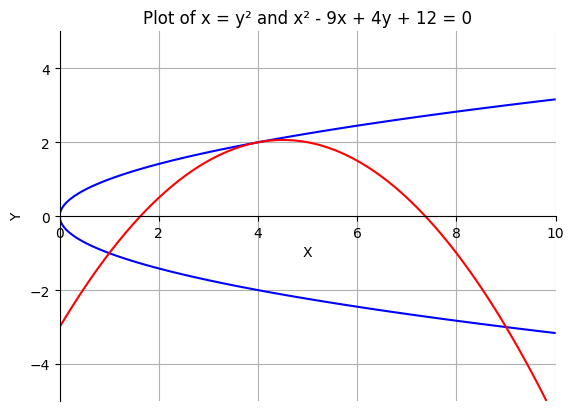

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(0, 10, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Define the first equation: X = Y^2
F1 = X - Y**2

# Plot the first equation contour line
cs1 = plt.contour(X, Y, F1, levels=[0], colors='blue', label='x = y²')

# Define the second equation: X² - 9X + 4Y + 12 = 0
F2 = X**2 - 9*X + 4*Y + 12

# Plot the second equation contour line with a different color
cs2 = plt.contour(X, Y, F2, levels=[0], colors='red', label='x² - 9x + 4y + 12 = 0')

# Configure the axes to cross at (0,0) and remove top/right spines
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and grid
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of x = y² and x² - 9x + 4y + 12 = 0')
plt.grid(True)


# Display the plot
plt.show()

Explanation:

The contour function returns a ContourSet object, which doesn't directly support the label parameter for legends.
Instead, we access the contour lines using plt.gca().collections and set their labels manually using set_label().
This ensures that both contours will appear in the legend with the correct labels.
If you prefer an alternative approach without using contour, you can directly plot the equations:

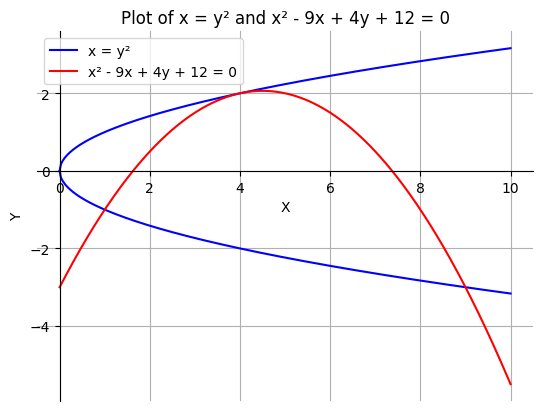

In [20]:
# Create x values
x = np.linspace(0, 10, 400)

# Equation 1: Y^2 = X => Y = ±sqrt(X)
Y1_pos = np.sqrt(x)
Y1_neg = -np.sqrt(x)

# Equation 2: Solve for Y from X² - 9X + 4Y + 12 = 0
Y2 = (9*x - x**2 - 12) / 4

# Plot the equations with labels
plt.plot(x, Y1_pos, color='blue', label='x = y²')
plt.plot(x, Y1_neg, color='blue')
plt.plot(x, Y2, color='red', label='x² - 9x + 4y + 12 = 0')

# Configure the axes and grid
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of x = y² and x² - 9x + 4y + 12 = 0')
plt.grid(True)
plt.legend()
plt.show()

To find the area in between the region, we can 

Area of Region 1 = 2.04167
Area of Region 2 = 7.29167
Area of Region 3 = 15.37500
Area of Region 4 = 9.95833
Total area (sum of all 4) = 34.66667


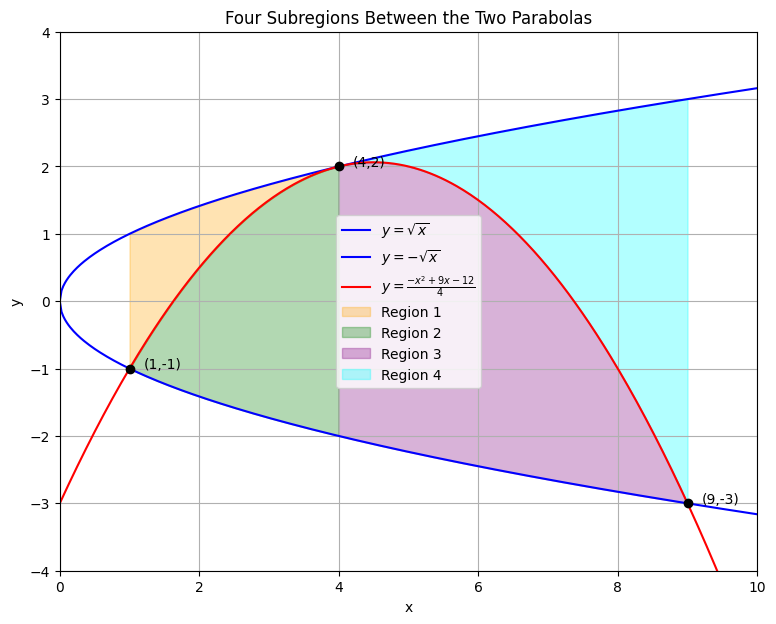

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --------------------------------------------------
# 1) Define the curves and intersection points
# --------------------------------------------------

# Curve 1 (blue): x = y^2  -->  y = ± sqrt(x)
# We'll often use y = sqrt(x) or y = -sqrt(x) as needed.

# Curve 2 (red): x^2 = 9x - 4y - 12
# Solve for y:
#   x^2 - 9x + 12 = -4y  ==>  y = (-x^2 + 9x - 12)/4
def y_red(x):
    return (-x**2 + 9*x - 12)/4

# Intersection points found analytically (or from prior work):
#   (1, -1), (4, 2), (9, -3)
# We will call them x=1, x=4, x=9 for convenience.
xA, yA = 1, -1
xB, yB = 4,  2
xC, yC = 9, -3

# --------------------------------------------------
# 2) Define the integrands for your 4 subregions
# --------------------------------------------------
# You must decide which curve is "top" and which is "bottom" on each interval.
# Below is just an EXAMPLE of how you might break them up.

# Region 1: from x=1 to x=4
#   Suppose top = sqrt(x), bottom = y_red(x)
def integrand_region1(x):
    return np.sqrt(x) - y_red(x)

# Region 2: from x=1 to x=4
#   Suppose top = y_red(x), bottom = -sqrt(x)
#   (Maybe you have a second piece in the same interval.)
def integrand_region2(x):
    return y_red(x) - (-np.sqrt(x))

# Region 3: from x=4 to x=9
#   Suppose top = y_red(x), bottom = -sqrt(x)
def integrand_region3(x):
    return y_red(x) - (-np.sqrt(x))

# Region 4: from x=4 to x=9
#   Suppose top = sqrt(x), bottom = y_red(x)
#   (Again, this is just an example if you had a second piece in that interval.)
def integrand_region4(x):
    return np.sqrt(x) - y_red(x)

# --------------------------------------------------
# 3) Numerically integrate each region
# --------------------------------------------------

area1, err1 = quad(integrand_region1, xA, xB)
area2, err2 = quad(integrand_region2, xA, xB)
area3, err3 = quad(integrand_region3, xB, xC)
area4, err4 = quad(integrand_region4, xB, xC)

# Print the individual areas
print(f"Area of Region 1 = {area1:.5f}")
print(f"Area of Region 2 = {area2:.5f}")
print(f"Area of Region 3 = {area3:.5f}")
print(f"Area of Region 4 = {area4:.5f}")

# Total area (if these 4 subregions are non-overlapping pieces of the total)
total_area = area1 + area2 + area3 + area4
print(f"Total area (sum of all 4) = {total_area:.5f}")

# --------------------------------------------------
# 4) Plot the curves and each subregion
# --------------------------------------------------

# For a nice plot, let's define a dense array of x-values
x_vals = np.linspace(0, 10, 400)

# Blue curve: y = ± sqrt(x)
y_plus  = np.sqrt(x_vals)
y_minus = -np.sqrt(x_vals)

# Red curve: y = y_red(x)
y_curve = y_red(x_vals)

plt.figure(figsize=(9, 7))

# Plot the two main curves
plt.plot(x_vals, y_plus,  'b', label='$y=\\sqrt{x}$')
plt.plot(x_vals, y_minus, 'b', label='$y=-\\sqrt{x}$')
plt.plot(x_vals, y_curve, 'r', label='$y=\\frac{-x^2+9x-12}{4}$')

# Mark intersection points
pts = [(1, -1), (4, 2), (9, -3)]
for (px, py) in pts:
    plt.plot(px, py, 'ko')
    plt.text(px+0.2, py, f'({px},{py})')

# ---------------------------
# Fill each region separately
# (this is just an example!)
# ---------------------------

# Region 1: x in [1,4], top = sqrt(x), bottom = y_red(x)
x_fill1 = np.linspace(xA, xB, 200)
top1 = np.sqrt(x_fill1)
bot1 = y_red(x_fill1)
plt.fill_between(x_fill1, bot1, top1, color='orange', alpha=0.3, label='Region 1')

# Region 2: x in [1,4], top = y_red(x), bottom = -sqrt(x)
x_fill2 = np.linspace(xA, xB, 200)
top2 = y_red(x_fill2)
bot2 = -np.sqrt(x_fill2)
plt.fill_between(x_fill2, bot2, top2, color='green', alpha=0.3, label='Region 2')

# Region 3: x in [4,9], top = y_red(x), bottom = -sqrt(x)
x_fill3 = np.linspace(xB, xC, 200)
top3 = y_red(x_fill3)
bot3 = -np.sqrt(x_fill3)
plt.fill_between(x_fill3, bot3, top3, color='purple', alpha=0.3, label='Region 3')

# Region 4: x in [4,9], top = sqrt(x), bottom = y_red(x)
x_fill4 = np.linspace(xB, xC, 200)
top4 = np.sqrt(x_fill4)
bot4 = y_red(x_fill4)
plt.fill_between(x_fill4, bot4, top4, color='cyan', alpha=0.3, label='Region 4')

plt.title("Four Subregions Between the Two Parabolas")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, 10])
plt.ylim([-4, 4])
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------------
# 5) (Optional) Show a final plot with all 4 combined
# --------------------------------------------------

# We can simply re-fill them all on the same axes or
# fill them as a single region if we want the combined area, etc.